## Time Series Prediction with FB Prophet
- This is a price prediction project using FB Prophet, an open source tool used in Time Series Forecasting.
- FB Prophet is known for its accuracy and forecasting simplicity. 
- A procedure for forecasting time series data based on an additive model where non-linear trends are  fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.
- It is an additive regression model with a piecewise linear or logistic growth curve trend. It includes a yearly seasonal component modeled using Fourier series and a weekly seasonal component modeled using dummy variables.

## Import Libraries

In [100]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet

import warnings
warnings.simplefilter("ignore")

## Import Data

In [101]:
avocado_df = pd.read_csv('../input/avocado-prices-2020/avocado-updated-2020.csv')

## Exploratory Data Analysis 

In [102]:
avocado_df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [103]:
# View the last elements in the training dataset
avocado_df.tail(10)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
30011,2020-05-17,1.31,117231.76,12121.98,47634.53,941.62,56533.63,44340.34,10544.39,1648.90,conventional,2020,Syracuse
30012,2020-05-17,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,organic,2020,Syracuse
30013,2020-05-17,1.12,591420.66,238039.66,16379.48,151.06,336846.03,276681.61,60134.42,30.00,conventional,2020,Tampa
30014,2020-05-17,1.19,14134.00,200.00,0.00,0.00,13933.00,13933.00,0.00,0.00,organic,2020,Tampa
30015,2020-05-17,1.16,51690121.14,15951219.72,9221698.67,728025.52,25788840.09,16896405.58,7972084.51,920350.00,conventional,2020,Total U.S.
30016,2020-05-17,1.58,2271254.00,150100.00,198457.00,5429.00,1917250.00,1121691.00,795559.00,0.00,organic,2020,Total U.S.
30017,2020-05-17,1.09,8667913.24,2081824.04,1020965.12,33410.85,5531562.87,2580802.48,2817078.77,133681.62,conventional,2020,West
30018,2020-05-17,1.71,384158.00,23455.00,39738.00,1034.00,319932.00,130051.00,189881.00,0.00,organic,2020,West
30019,2020-05-17,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,conventional,2020,West Tex/New Mexico
30020,2020-05-17,1.58,36881.00,1147.00,1243.00,2645.00,31846.00,25621.00,6225.00,0.00,organic,2020,West Tex/New Mexico


In [104]:
avocado_df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000
mean,1.390930,9.392546e+05,2.991073e+05,2.849014e+05,2.162937e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123
std,0.381347,3.813519e+06,1.289108e+06,1.169078e+06,1.009188e+05,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.110000,1.429853e+04,7.827800e+02,2.814000e+03,0.000000e+00,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000
50%,1.350000,1.242047e+05,1.052276e+04,2.456722e+04,1.867500e+02,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000
75%,1.630000,4.898029e+05,1.151556e+05,1.409472e+05,5.424160e+03,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000


In [105]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [106]:
# inquire if the data contains null elements in the dataset
avocado_df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [107]:
# sort values based on Date column
avocado_df = avocado_df.sort_values('date')

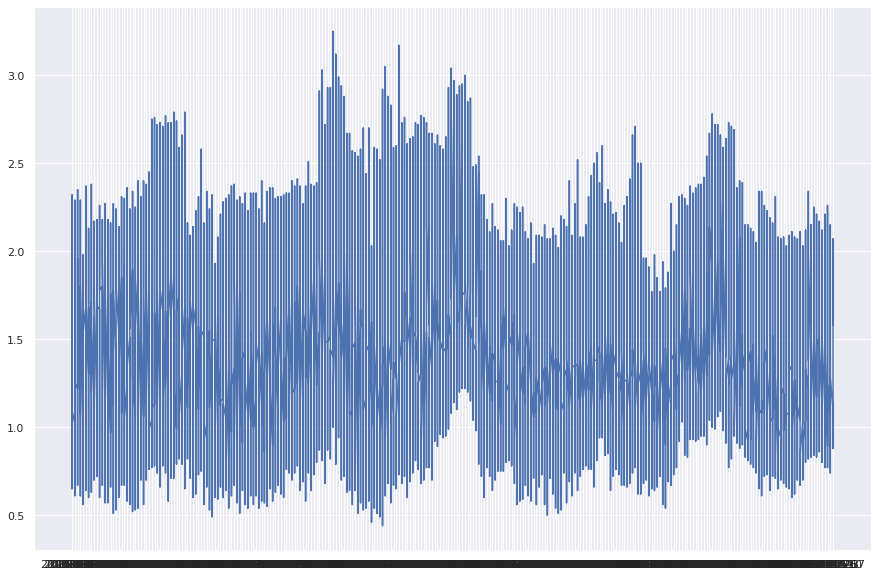

In [108]:
# Plot date and average price
plt.figure(figsize = (15,10))
plt.plot(avocado_df['date'], avocado_df['average_price'])

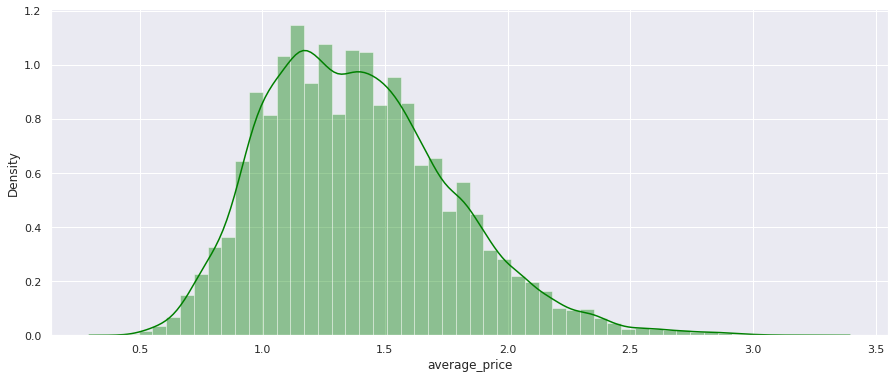

In [109]:
# Plot distribution of the average price
plt.figure(figsize=(15,6))
sns.distplot(avocado_df['average_price'], color='green');

<AxesSubplot:xlabel='type', ylabel='average_price'>

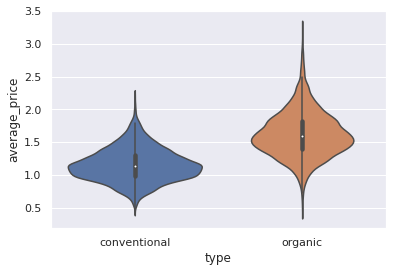

In [110]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(x='type', y='average_price', data=avocado_df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Roanoke'),
  Text(2, 0, 'Richmond/Norfolk'),
  Text(3, 0, 'Raleigh/Greensboro'),
  Text(4, 0, 'Portland'),
  Text(5, 0, 'Plains'),
  Text(6, 0, 'Pittsburgh'),
  Text(7, 0, 'Phoenix/Tucson'),
  Text(8, 0, 'Philadelphia'),
  Text(9, 0, 'Orlando'),
  Text(10, 0, 'Northern New England'),
  Text(11, 0, 'Northeast'),
  Text(12, 0, 'New York'),
  Text(13, 0, 'Sacramento'),
  Text(14, 0, 'San Diego'),
  Text(15, 0, 'West Tex/New Mexico'),
  Text(16, 0, 'West'),
  Text(17, 0, 'Total U.S.'),
  Text(18, 0, 'Tampa'),
  Text(19, 0, 'Syracuse'),
  Text(20, 0, 'St. Louis'),
  Text(21, 0, 'New Orleans/Mobile'),
  Text(22, 0, 'Spokane'),
  Text(23, 0, 'Southeast'),
  Text(24, 0, 'South Central'),
  Text(25, 0, 'South Ca

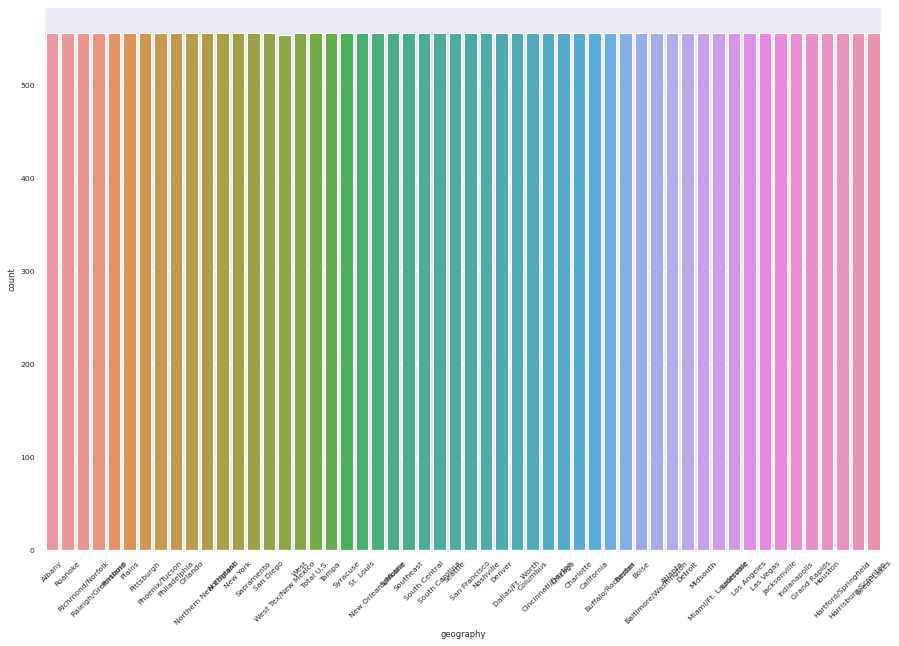

In [111]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[15,10])
sns.countplot(x = 'geography', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020')])

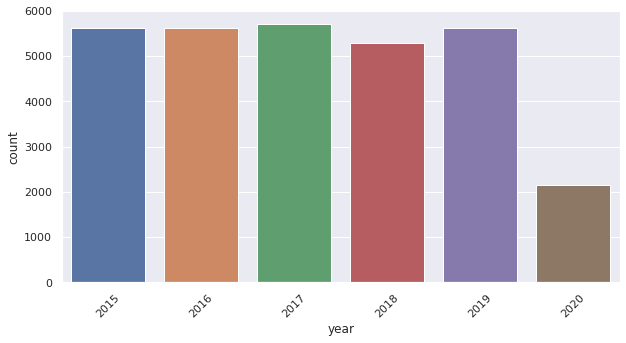

In [112]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.0) 
plt.figure(figsize=[10,5])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

In [113]:
# Create dataframe for FB Prophet
avocado_prophet_df = avocado_df[['date', 'average_price']] 

In [114]:
avocado_prophet_df

,date,average_price
0,2015-01-04,1.22
78,2015-01-04,1.13
77,2015-01-04,1.54
76,2015-01-04,1.13
75,2015-01-04,2.01
...,...,...
29942,2020-05-17,1.61
29941,2020-05-17,1.41
29940,2020-05-17,1.57
29951,2020-05-17,1.15


In [115]:
# Rename columns required in FB Prophet
avocado_prophet_df = avocado_prophet_df.rename(columns={'date':'ds', 'average_price':'y'})

In [116]:
avocado_prophet_df

,ds,y
0,2015-01-04,1.22
78,2015-01-04,1.13
77,2015-01-04,1.54
76,2015-01-04,1.13
75,2015-01-04,2.01
...,...,...
29942,2020-05-17,1.61
29941,2020-05-17,1.41
29940,2020-05-17,1.57
29951,2020-05-17,1.15


## Modeling and Prediction

In [117]:
m = Prophet()
m.fit(avocado_prophet_df)

In [118]:
# Apply Predict
future = m.make_future_dataframe(periods=365)
prediction = m.predict(future)

In [119]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.328528,0.865277,1.866684,1.328528,1.328528,0.031521,0.031521,0.031521,0.159555,0.159555,0.159555,-0.128034,-0.128034,-0.128034,0.0,0.0,0.0,1.360049
1,2015-01-11,1.322587,0.889079,1.841066,1.322587,1.322587,0.038986,0.038986,0.038986,0.159555,0.159555,0.159555,-0.120569,-0.120569,-0.120569,0.0,0.0,0.0,1.361574
2,2015-01-18,1.316647,0.899621,1.824794,1.316647,1.316647,0.036017,0.036017,0.036017,0.159555,0.159555,0.159555,-0.123538,-0.123538,-0.123538,0.0,0.0,0.0,1.352664
3,2015-01-25,1.310706,0.880705,1.803691,1.310706,1.310706,0.018712,0.018712,0.018712,0.159555,0.159555,0.159555,-0.140843,-0.140843,-0.140843,0.0,0.0,0.0,1.329418
4,2015-02-01,1.304765,0.852474,1.780562,1.304765,1.304765,-0.002992,-0.002992,-0.002992,0.159555,0.159555,0.159555,-0.162547,-0.162547,-0.162547,0.0,0.0,0.0,1.301773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,2021-05-13,1.093477,0.501762,1.604560,0.786315,1.401450,-0.060102,-0.060102,-0.060102,-0.056864,-0.056864,-0.056864,-0.003238,-0.003238,-0.003238,0.0,0.0,0.0,1.033375
639,2021-05-14,1.093219,0.473650,1.571794,0.784374,1.403097,-0.059104,-0.059104,-0.059104,-0.056864,-0.056864,-0.056864,-0.002240,-0.002240,-0.002240,0.0,0.0,0.0,1.034115
640,2021-05-15,1.092962,0.472515,1.592714,0.783831,1.405291,-0.058035,-0.058035,-0.058035,-0.056864,-0.056864,-0.056864,-0.001171,-0.001171,-0.001171,0.0,0.0,0.0,1.034927
641,2021-05-16,1.092705,0.717902,1.823821,0.782487,1.406778,0.159517,0.159517,0.159517,0.159555,0.159555,0.159555,-0.000038,-0.000038,-0.000038,0.0,0.0,0.0,1.252222


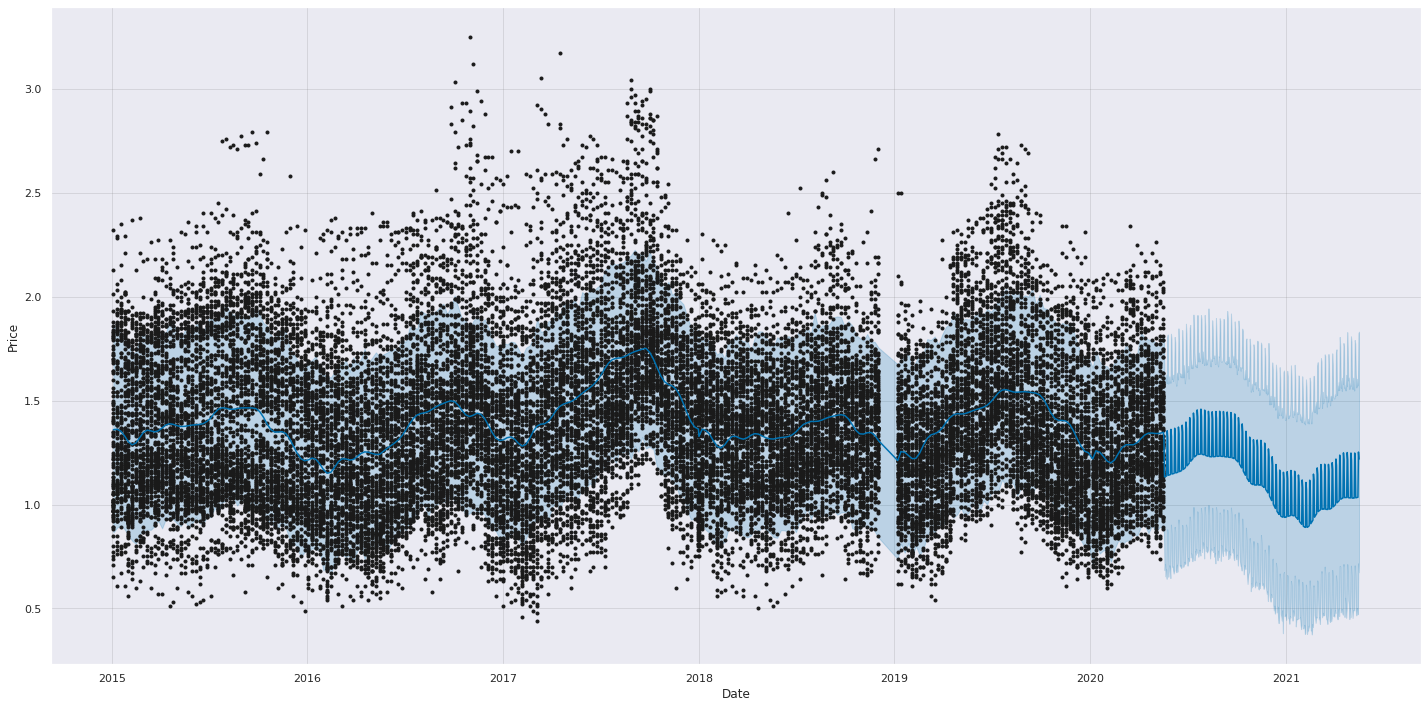

In [120]:
figure = m.plot(prediction, xlabel='Date', ylabel='Price', figsize=(20,10))

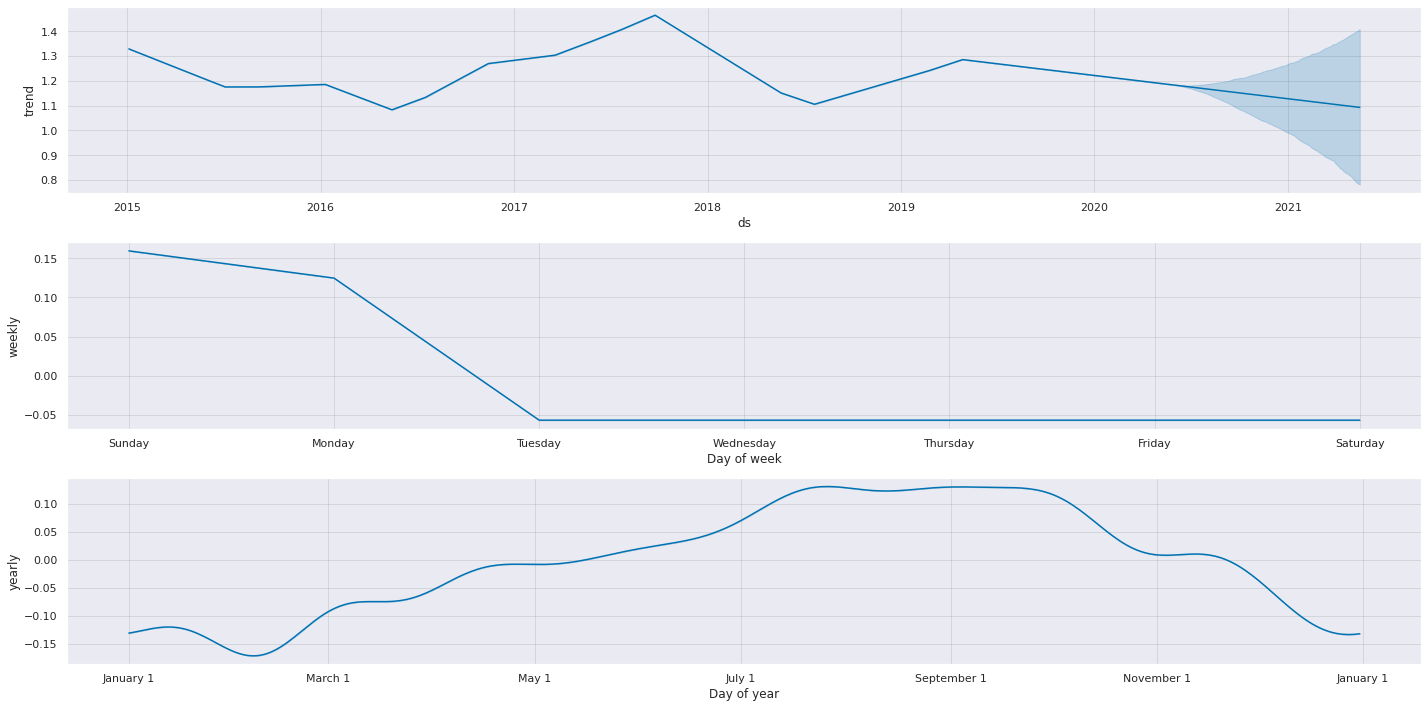

In [121]:
# Visualize prediction in certain periods
figure2 =  m.plot_components(prediction, figsize = (20,10))
